In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


C_values = [0.001, 0.001, 0.1, 1, 5, 10, 100]

final_results = []


In [ ]:
def evaluate_logistic(X_train, X_test, transformation_name, iters):
    print(f"\n=== {transformation_name} ===")
    
    train_acc_list = []
    test_acc_list = []
    precision_list = []
    recall_list = []

    for C in C_values:
        model = LogisticRegression(C=C, max_iter=, solver='lbfgs', random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
        recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)

        final_results.append({
            'Transformation': transformation_name,
            'C': C,
            'Train Accuracy': train_acc,
            'Test Accuracy': test_acc,
            'Precision': precision,
            'Recall': recall
        })

        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        precision_list.append(precision)
        recall_list.append(recall)

    # Plot accuracy vs C
    plt.figure(figsize=(8,5))
    plt.plot(C_values, train_acc_list, marker='o', label='Training Accuracy')
    plt.plot(C_values, test_acc_list, marker='o', label='Testing Accuracy')
    plt.xscale('log')
    plt.xlabel('C (log scale)')
    plt.ylabel('Accuracy')
    plt.title(f'Training vs Testing Accuracy: {transformation_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Show Precision/Recall Table
    prec_recall_table = pd.DataFrame({
        'C': C_values,
        'Precision': precision_list,
        'Recall': recall_list
    })
    print(f"\nPrecision and Recall Table ({transformation_name}):")
    display(prec_recall_table)


=== No Transform ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means

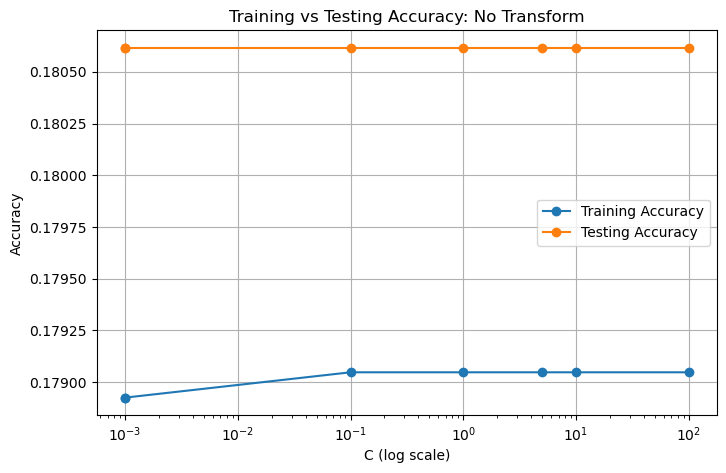


Precision and Recall Table (No Transform):


,C,Precision,Recall
0,0.001,0.135801,0.180617
1,0.001,0.135801,0.180617
2,0.100,0.136191,0.180617
3,1.000,0.136191,0.180617
4,5.000,0.136191,0.180617
5,10.000,0.136191,0.180617
6,100.000,0.136191,0.180617


In [32]:
# No transformation (baseline)
evaluate_logistic(X_train, X_test, 'No Transform', 5000)


=== Polynomial Degree 2 ===


/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniconda/base/envs/SE/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

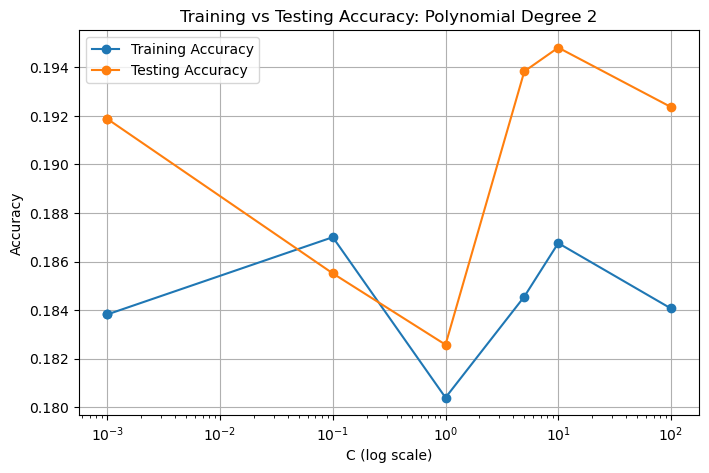


Precision and Recall Table (Polynomial Degree 2):


,C,Precision,Recall
0,0.001,0.180185,0.191875
1,0.001,0.180185,0.191875
2,0.100,0.132276,0.185512
3,1.000,0.144102,0.182575
4,5.000,0.161556,0.193833
5,10.000,0.174838,0.194812
6,100.000,0.171773,0.192364


In [35]:
# Polynomial Features Degree 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_test_poly2 = poly2.transform(X_test)

evaluate_logistic(X_train_poly2, X_test_poly2, 'Polynomial Degree 2',1000)

In [ ]:
# Polynomial Features Degree 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_test_poly3 = poly3.transform(X_test)

evaluate_logistic(X_train_poly3, X_test_poly3, 'Polynomial Degree 3',2000)

In [ ]:
# Logarithmic Transformation
X_train_log = np.log(X_train + 1e-5 - np.min(X_train))
X_test_log = np.log(X_test + 1e-5 - np.min(X_train))

evaluate_logistic(X_train_log, X_test_log, 'Log Transform',1000)

In [ ]:
# Save final results
final_results_df = pd.DataFrame(final_results)
from IPython.display import display
print("\n=== Final Logistic Regression Results ===")
display(final_results_df)
final_results_df.to_csv('logistic_final_metrics_results.csv', index=False)
print("Saved Logistic Regression metrics to 'logistic_final_metrics_results.csv'")